In [2]:
from keras.models import load_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Cargar el modelo
loaded_model = load_model('../models/model-1-10epoch.h5')

In [4]:
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 98, 98, 32)   896         ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 49, 49, 32)  0           ['conv2d_16[0][0]']              
 )                                                                                                
                                                                                            

In [5]:
df_val = pd.read_csv(r'..\Data\processed\val-processed.csv')


images_val = np.load(
    '../Data/processed/image_array100_val.npy', allow_pickle=True)

In [6]:
X_val = images_val
y_gender_val = df_val['Gender']
y_age_raw_val = df_val['Age']
y_age_val = y_age_raw_val / 80

y_gender_val = np.array(y_gender_val)
y_age_val = np.array(y_age_val)

print('Dimensiones de X:', X_val.shape)
print('Dimensiones de y_gender:', y_gender_val.shape)
print('Dimensiones de y_age:', y_age_val.shape)

Dimensiones de X: (6685, 100, 100, 3)
Dimensiones de y_gender: (6685,)
Dimensiones de y_age: (6685,)


In [7]:
pred = loaded_model.predict(X_val)

y_age_pred = np.round(80*pred[1],2)
y_gender_pred = np.round(pred[0],2)

209/209 [==============================] - 7s 32ms/step


In [11]:
# Evaluamos al modelo.
loaded_model.evaluate(X_val, [y_gender_val, y_age_val])

209/209 [==============================] - 8s 38ms/step - loss: 0.5832 - gender_out_loss: 0.4450 - age_out_loss: 0.1382 - gender_out_accuracy: 0.8612 - age_out_accuracy: 0.0034


[0.583186686038971,
 0.4449916183948517,
 0.13819508254528046,
 0.8611817359924316,
 0.0034405384212732315]

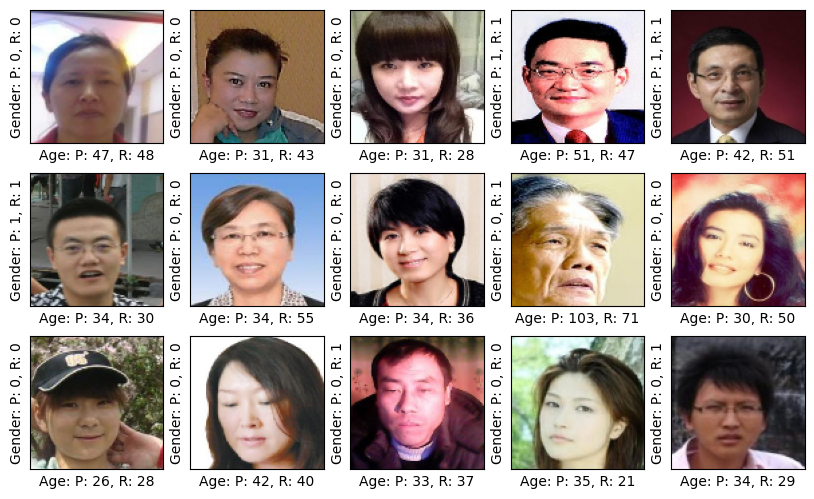

In [ ]:
# Verificamos que todo esté correcto:
plt.figure(figsize=(10, 6))
paso = 0

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_val[i+paso])
    plt.xlabel(f'Age: P: {int(y_age_pred[i+paso])}, R: {y_age_raw_val[i+paso]}')
    plt.ylabel(f'Gender: P: {int(y_gender_pred[i+paso])}, R: {y_gender_val[i+paso]}')
plt.show()

In [13]:
error_edad=np.zeros(len(range(2,81)))
count_edad = np.zeros(len(range(2,81)))
x_error_edad = np.array(range(2,81))

for y_edad, predicho in zip(y_age_raw_val, y_age_pred):
    for i_edad, edad in enumerate(x_error_edad):
        if edad == y_edad:
            
            count_edad[i_edad]+=1 
            error_edad[i_edad] += abs(y_edad-float(predicho))
            
error_edad = error_edad / count_edad

Text(0.5, 1.0, 'Error por edades')

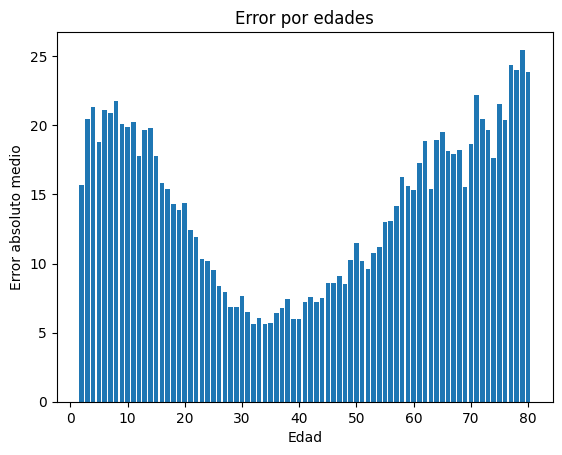

In [14]:
plt.bar(x_error_edad, error_edad)
plt.ylabel('Error absoluto medio')
plt.xlabel('Edad')
plt.title('Error por edades')

Podemos ver como este modelo clasifica mucho mejor las personas de mediana edad teniendo mucho error para edades muy avanzadas y para los niños. Esto podría deberse a la sobrerepresentación de este grupo de edad respecto a los otros dos en el set de datos. 

Aunque se podrían haber utilizado tecnicas como generación de imágenes para solucionar este problema.

In [15]:
# Vamos a ver como los clasifica por grupos de edad: 
# Aquí lo he hecho como comprobación pero no he hecho el modelo entrenado por grupos
# al final por no hacer otra arquitectura y demás...
grupos = np.array([10,20,30,40,50,60,70])
aciertos_grupo=np.zeros(grupos.shape)
errores_grupo= np.zeros(grupos.shape)
x_error_edad = np.array(grupos.shape)

for y_edad, predicho in zip(y_age_raw_val, y_age_pred):
    for i, grupo in enumerate(grupos):
        if y_edad <=10:
            if predicho <=10:
                aciertos_grupo[i]+=1 
            else:
                errores_grupo[i]+=1
        else:
            for j, edad in enumerate(grupos):
                if y_edad > edad and y_edad >= grupos[i-1]:
                    aciertos_grupo[i]+=1
                else:
                    errores_grupo[i]+=1
            

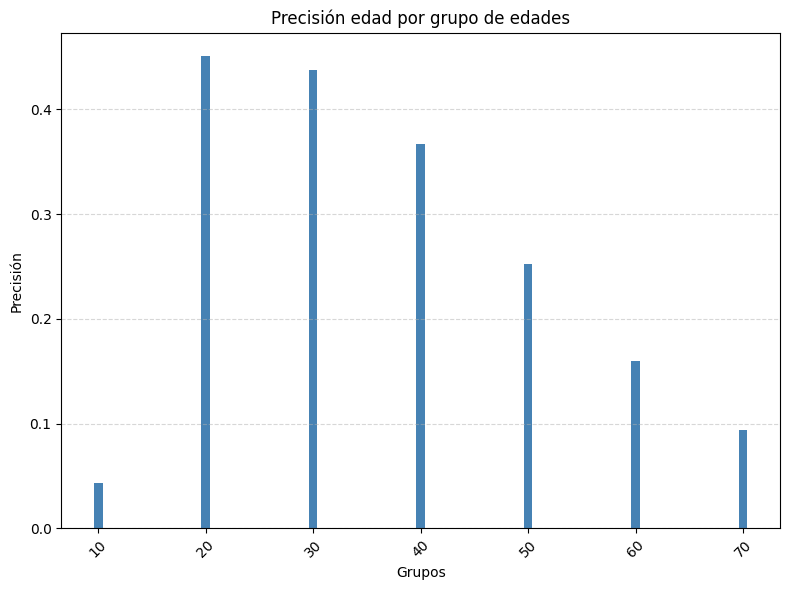

In [ ]:
acc_edades = aciertos_grupo/(aciertos_grupo+errores_grupo)

plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
plt.bar(grupos, acc_edades, color='steelblue')  # Establecer el color de las barras
plt.xlabel('Grupos')  # Etiqueta del eje x
plt.ylabel('Precisión')  # Etiqueta del eje y
plt.title('Precisión edad por grupo de edades')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el espaciado de los elementos
plt.show()